In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [2]:
def winpercentages(env="ConnectFour", t1=1.0, t2=1.0, c1=1.0, c2=1.0, e1=0.01, e2=0.01, treepolicy1="ucb", treepolicy2="ucb"):
    if treepolicy1 == "epsilon_greedy" and treepolicy2 == "epsilon_greedy":
        filename = f"{env}-e{e1}t{t1}-e{e2}t{t2}.csv"
    elif treepolicy1 == "epsilon_greedy" and treepolicy2 == "ucb":
        filename = f"{env}-e{e1}t{t1}-c{c2}t{t2}.csv"
    elif treepolicy1 == "ucb" and treepolicy2 == "epsilon_greedy":
        filename = f"{env}-c{c1}t{t1}-e{e2}t{t2}.csv"
    elif treepolicy1 == "ucb" and treepolicy2 == "ucb":
        filename = f"{env}-c{c1}t{t1}-c{c2}t{t2}.csv"
    df=pd.read_csv(filename)
    return np.mean(df.Agent1==1.0), np.mean(df.Agent2==1.0), np.mean(df.Steps)

In [3]:
'''Information about one specific agent against another specific agent'''

df=pd.read_csv("ConnectFour-e0.1t1.0-c1.3t1.0.csv")
print(df)
print(df.describe())
w,l,s = winpercentages(env="ConnectFour", t1=1.0,t2=1.0,e1=0.1,c2=1.3,treepolicy1="epsilon_greedy",treepolicy2="ucb")
print("Agent 1 win percetage = ", 100*w)
print("Agent 2 win percetage = ", 100*l)
print("Average length of game (in number of steps) = ", s)

     Agent1  Agent2  Steps
0      -1.0     1.0     40
1      -1.0     1.0     40
2       1.0    -1.0     37
3       1.0    -1.0     31
4       1.0    -1.0     31
..      ...     ...    ...
495     1.0    -1.0     41
496     1.0    -1.0     33
497     1.0    -1.0     31
498     1.0    -1.0     35
499     1.0    -1.0     35

[500 rows x 3 columns]
           Agent1      Agent2       Steps
count  500.000000  500.000000  500.000000
mean    -0.258000    0.258000   32.056000
std      0.951444    0.951444    6.225623
min     -1.000000   -1.000000    7.000000
25%     -1.000000   -1.000000   28.000000
50%     -1.000000    1.000000   34.000000
75%      1.000000    1.000000   36.000000
max      1.000000    1.000000   42.000000
Agent 1 win percetage =  35.6
Agent 2 win percetage =  61.4
Average length of game (in number of steps) =  32.056


In [4]:
ucbs = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
epss = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]

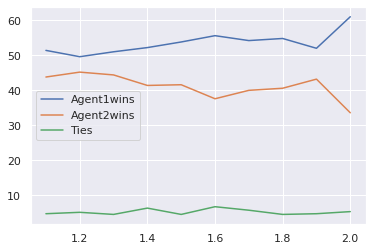

In [5]:
"Fixed agent 1 with ucb tree policy against varying agent 2 with ucb tree policy"

c1=1.3
w1list=[]
w2list=[]
slist=[]
tielist=[]
for c2 in ucbs:
    w1,w2,s=winpercentages(c1=c1,c2=c2,treepolicy1="ucb",treepolicy2="ucb")
    w1list.append(w1)
    w2list.append(w2)
    slist.append(s)
    tielist.append(1-w1-w2)
plt.plot(ucbs,100*np.array(w1list),label="Agent1wins")
plt.plot(ucbs,100*np.array(w2list),label="Agent2wins")
plt.plot(ucbs,100*np.array(tielist),label="Ties")
plt.legend()

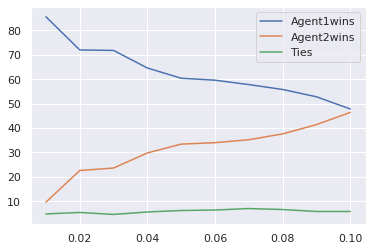

In [6]:
"Fixed agent 1 with epsilon_greedy tree policy against varying agent 2 with epsilon_greedy tree policy"

e1=0.1
w1list=[]
w2list=[]
slist=[]
tielist=[]
for e2 in epss:
    w1,w2,s=winpercentages(e1=e1,e2=e2,treepolicy1="epsilon_greedy",treepolicy2="epsilon_greedy")
    w1list.append(w1)
    w2list.append(w2)
    slist.append(s)
    tielist.append(1-w1-w2)
plt.plot(epss,100*np.array(w1list),label="Agent1wins")
plt.plot(epss,100*np.array(w2list),label="Agent2wins")
plt.plot(epss,100*np.array(tielist),label="Ties")
plt.legend()

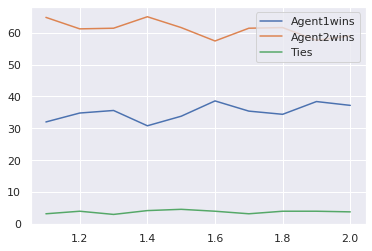

In [7]:
"Fixed agent 1 with epsilon_greedy tree policy against varying agent 2 with ucb tree policy"

e1=0.1
w1list=[]
w2list=[]
slist=[]
tielist=[]
for c2 in ucbs:
    w1,w2,s=winpercentages(e1=e1,c2=c2,treepolicy1="epsilon_greedy",treepolicy2="ucb")
    w1list.append(w1)
    w2list.append(w2)
    slist.append(s)
    tielist.append(1-w1-w2)
plt.plot(ucbs,100*np.array(w1list),label="Agent1wins")
plt.plot(ucbs,100*np.array(w2list),label="Agent2wins")
plt.plot(ucbs,100*np.array(tielist),label="Ties")
plt.legend()